## Name: Yusuf Elnady

# Some Needed Imports

In [54]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import random
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Q2.a K-Means Clustering

The Centroids after 10 iterations are:
( 6.02440316939379 , 2.9726605369458947 )
( 3.034582544606674 , 0.9985308034402206 )
( 1.983631519927153 , 5.030430038142128 )


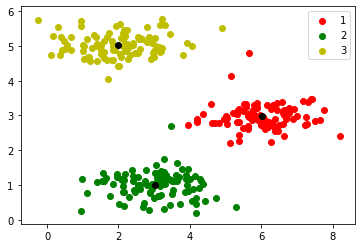

In [55]:
data = loadmat('data1.mat')['X']
n_points = len(data)
random.seed(30)
centroids_idx = random.sample(range(0, n_points), 3)
centroids = [data[centroid_idx] for centroid_idx in centroids_idx]

    
    
points_clusters = []
for i in range(10):
    # Cluster every datapoint to one of the 3 clusters
    for point in data:
        #Calculate distance from the centroid of each cluster
        distance=[np.linalg.norm(point-centroid) for centroid in centroids]
        points_clusters.append(np.argmin(distance)+1)

    # Update the centroids after we have formed the clusters
    new_centroids = []
    df = pd.concat([pd.DataFrame(data, columns=['X1','X2']),
                    pd.DataFrame(points_clusters, columns=['label'])],axis=1)
    
    #Calculate the mean for each cluster
    for cluster in np.unique(points_clusters):
        current_cluster = df[df['label'] == cluster][['X1','X2']]
        new_centroids.append(current_cluster.mean())
    centroids = new_centroids

#======================================================================================#

print("The Centroids after 10 iterations are:")
for centroid in centroids:
    print("(",centroid['X1'],",",centroid['X2'],")")
    
COLOR_DICT = {1 : 'r', 2 : 'g', 3 : 'y'}

fig, ax = plt.subplots()
for cluster in np.unique(points_clusters):
    current_cluster = df[df['label'] == cluster][['X1','X2']]
    ax.scatter(current_cluster['X1'],current_cluster['X2'], c = COLOR_DICT[cluster], label = cluster)
    
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')

ax.legend()
plt.show()


**The Centroids after 10 iterations are:**

**(X1, X2)**

**(6.024403169393790, 2.9726605369458947)**

**(3.034582544606674,  0.9985308034402206)**

**(1.983631519927153, 5.030430038142128)**

# Q2.b Anomaly Detection

In [56]:
All = loadmat('data2.mat')
data = pd.DataFrame(All['X'])
Xval = pd.DataFrame(All['Xval'])
yval = pd.DataFrame(All['yval']) #If 1 then outlier, if 0 then normal point

def get_probs(X):
    n_points = len(X)
    mu = np.sum(X, axis=0)/n_points
    Σ =  np.diag(np.sum((data - mu)**2, axis=0)/n_points)
    n_cols = len(mu)
    x_m = X-mu
    denom = np.sqrt((2*np.pi)**(n_cols)*np.linalg.det(Σ))
    nom =  np.exp(-0.5*np.sum(x_m.dot(np.linalg.inv(Σ))*x_m,axis=1))
    probs =nom/denom
    return probs

def get_F1_score(probs,threshold,y):
    TP,FP,FN,F1 = 0,0,0,0
    for i in range(len(y)):
        if probs[i] <= threshold and y[0][i] == 1:
            TP += 1
        elif probs[i] <= threshold and y[0][i] == 0:
            FP += 1
        elif probs[i] > threshold and y[0][i] == 1:
            FN += 1
#     prec = TP/(TP+FP)
#     rec = TP/(TP+FN)
    F1 = 2*TP/(2*TP+FP+FN)
    return F1



In [57]:
max_F1_score = -1
best_threshold = -1
F1_scores = []
thresholds = []
begin = 4.5e-36
end =  0.09
step_size = (end-begin)/(1000-1)

probs = get_probs(Xval)
for threshold in np.arange(begin,end+1,step_size):
    F1_score = get_F1_score(probs,threshold,yval)
    F1_scores.append(F1_score)
    thresholds.append(threshold)
    


1


In [58]:
idx = np.array(F1_scores).argmax()
best_threshold = thresholds[idx]

print("The maximum F1-Score is",max(F1_scores))
print("The best threshold is",best_threshold)

The maximum F1-Score is 0.875
The best threshold is 9.009009009009009e-05


The number of outliers is 6


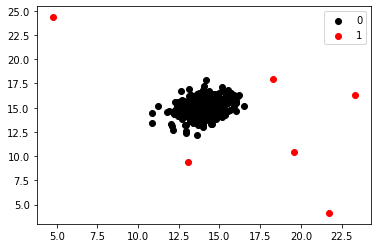

In [59]:
labels = []
probs = get_probs(data)
for i in range(len(data)):
    labels.append(1 if probs[i] <= best_threshold else 0)

        
df = pd.concat([pd.DataFrame(data),pd.DataFrame(labels, columns=['label'])],axis=1)

COLOR_DICT = {0 : 'k', 1 : 'r'}

fig, ax = plt.subplots()
for cluster in np.unique(labels):
    current_cluster = df[df['label'] == cluster] #Cluster here means either normal or outlier datapoints
    ax.scatter(current_cluster[0],current_cluster[1], c = COLOR_DICT[cluster], label = cluster)
    

ax.legend()
print("The number of outliers is",len(df[df['label'] == 1]))
plt.show()


**The maximum F1-Score is 0.875**

**The best threshold is 9.009009009009009e-05**

**The number of outliers is 6**